In [2]:
from helper import *

data_dir = "/data/flow_graphs/COOKING"

# FlowGraph paper from LREC 2020

## NER for identifying entities and actions
Performs NER first on the list of recipes to annotate 100 recipes originally present in the 2014 corpus along with an additional 200 recipes. Has tags for actions, food ingredients, tools, durations, quantities, and eventual states of the objects. 

## Flow-graph edges between the different entities
Flow-graph edges are annotated between different entities. 
Edges also exist between actions; *temporal ordering is present*. 
Edge-weights were computed between all possible pair of entities. Avoids using inter-sentence phenomena like coreference, anaphora, and ellipses. 

### .list files has the list of entities denoted by (step_no, sentence_no, token_no)
### .flow files has the relations between the said entities.







# RecipeNLG paper, ICNLG 2020

Created a dataset of cooking recipes by fixing errors in the original dataset. 


In [6]:
df = pd.read_csv(f"{data_dir}/RecipeNLG/dataset/full_dataset.csv")

In [8]:
recipes_nlg_dict    = ddict(list)
for index, row in tqdm(df.iterrows()):
    title           = row[cd 'title']
    directions      = ' '.join(ast.literal_eval(row['directions']))
    recipes_nlg_dict[title].append(directions)

2231142it [06:17, 5905.97it/s]


Unique recipes = 1312871; Original size = 2231142


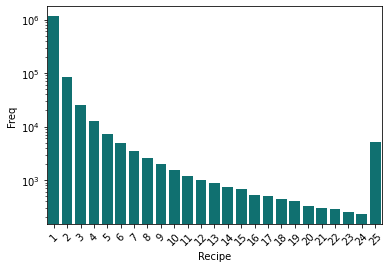

In [22]:
print(f"Unique recipes = {len(recipes_nlg_dict)}; Original size = {len(df)}")

count_recipes = Counter([len(recipes_nlg_dict[recipe]) for recipe in recipes_nlg_dict])

import matplotlib.pyplot as plt
import seaborn as sns

count_dict = ddict(list)
threshold = 25
last_freq = 0

for recipe_num in sorted(count_recipes):
    if recipe_num < threshold:
        count_dict["Recipe"].append(recipe_num)
        count_dict["Freq"].append(count_recipes[recipe_num])
    else:
        last_freq += count_recipes[recipe_num]

count_dict["Recipe"].append(threshold)
count_dict["Freq"].append(last_freq)

count_df = pd.DataFrame(count_dict)
g = sns.barplot(x="Recipe", y="Freq", data=count_df, color="teal")
g.set_yscale("log")
plt.xticks(rotation=45)
plt.show()

In [31]:
from pprint import pprint

same_recipes = {}
for recipe in recipes_nlg_dict:
    if len(recipes_nlg_dict[recipe]) == 5:
        same_recipes[recipe] = recipes_nlg_dict[recipe]

for idx, recipe_name in enumerate(same_recipes):
    print(recipe_name)
    for recipe in same_recipes[recipe_name]:
        print(recipe)
        print()

    if idx == 20:
        break

Gooey Coffee Cake
Mix together cake mix, 2 eggs and melted oleo. Put in greased 9 x 13-inch pan. Put chopped nuts on top of mixture. Mix together 2 eggs, cream cheese and powdered sugar. Add on top of first mixture. Bake 15 minutes at 325°, then bake 20 minutes at 350°.

With wooden spoon mix cake mix, eggs and melted oleo. Spread in a baking pan. Do not grease pan. A glass pan works well. Beat cream cheese, eggs and powdered sugar until smooth. Spread over cake dough in pan. Bake 40 minutes at 350°, sprinkle with 1/4 cup confectioners sugar when cake is cool. Cut into squares.

Mix 2 well beaten eggs with yellow cake mix and 1 stick melted butter. This will be sticky like a dough. Spread in the bottom of a greased and floured cake pan. May have to use fingers. Then mix the powdered sugar, cream cheese, 2 well beaten eggs and vanilla in a blender until smooth and pour on top of the other. Bake at 350° for 35 to 40 minutes.

Lightly sprinkle 1/2 c. pecans over bottom of greased 9 x 13 p

## RiSEC , AACL 2020

Improved upon the original CURD dataset by adding annotation information corresponding to coreferent ingredients, called zero anaphora. 

Does NOT FOCUS specifically on the task of Flow Graph Generation but can be extended based on the annotation scheme. 

They borrow the annotation scheme from PropBank; does not actually use the PropBank or VerbNet parser for SRL. 

[Provides another dataset to compare anaphora resolution in our patent corpus]




## RiSEC dataset



## Chemu

In [3]:
from glob import glob
import os, random

ann_files = glob("/data/flow_graphs/chemu/train/*.ann")
random.shuffle(ann_files)

train_split = 0.8

for idx in range(int(len(ann_files) * train_split), len(ann_files)):
    src_file = ann_files[idx]
    dest_file = src_file.replace("train", "dev")
    os.system(f"mv {src_file} {dest_file}")
    src_file = src_file.replace("ann", "txt")
    dest_file = src_file.replace("train", "dev")
    os.system(f"mv {src_file} {dest_file}")

/usr0/home/rdutt/anaconda3/envs/torch-geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[<Graph object (top=z1) at 140527059347632>, <Graph object (top=z1) at 140527975727840>, <Graph object (top=z1) at 140527975730096>, <Graph object (top=z1) at 140527975728944>, <Graph object (top=z1) at 140527975728752>]
